## Problem Statement

**Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability
customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers
(asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more
loan business and in the process, earn more through the interest on loans. In particular, the management
wants to explore ways of converting its liability customers to personal loan customers (while retaining them as
depositors).


A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9%
success. This has encouraged the retail marketing department to devise campaigns with better target
marketing to increase the success ratio.


We need to build a model that will help the marketing department to identify the potential customers 
who have a higher probability of purchasing the loan.


**Objective**

To predict whether a liability customer will buy personal loans, to understand which customer attributes are
most significant in driving purchases, and to identify which segment of customers to target more.


**Data Dictionary**

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: # years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: The family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have a securities account with the bank?

## Importing the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune models by searching for best combination of hyperparameters
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('Loan_Modelling.csv')

In [3]:
# creating a copy to keep reference of original data
data_copy = data.copy()

## Data Overview

#### View the first and last 5 rows of the dataset.

In [4]:
# First 5 rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Last 5 rows of the dataset
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### Understand the shape of the dataset.

In [6]:
# Understanding shape of the data
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns
* In essence, we have 5000 data points and 14 features for each data point.

#### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations -**
* Personal_Loan is the dependent variable and it is integer type.
* All the independent variables are numeric type.
* Except for average spending on credit card per month, all columns are integer type.

#### Checking for missing values

In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values on the dataset

#### Handling the duplicate values

In [9]:
data.duplicated().sum()

0

* There are no duplicated rows in the dataset.

#### Dropping columns with all unique values

In [10]:
data["ID"].nunique()

5000

* All values in ID column are unique which is expected, we can drop the column as it adds no value
* IDs are generally autogenerated to uniquely identify a customer and hence don't necessarily reflect any customer trait.

In [11]:
data.drop(["ID"], axis=1, inplace=True)

#### Statistical summary of the dataset

In [12]:
data.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000




**Observations**   

* Customers are 23 to 67 years of age.
* Customers on an average have 20 years of experience.
* Experience column also has certain negative values resulting in -ve min which is invalid and needs to be handled. 
* Customers have family size of atleast 1 and maximum family size is 4.
* Average income is 73.7, but the standard deviation is quite high (46.0), indicating a wide spread. The max value of 224 suggests a few high-income individuals.
* Average mortgage is 56.49 with a max of 635, showing a wide spread and potential skewness.
* CCAvg (average credit card spending) has a max value of 10, which seem unusually high given that unit is thousands of dollars.
* Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard are binary (0 or 1). Their means indicate the proportion of customers with each feature.
* For Personal_Loan column (dependent variable), 9.6% customers belong to one class, which means there is a class imbalance.


## Exploratory Data Analysis (EDA)

##### Helper Functions

**The below functions need to be defined to carry out the EDA.**

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Univariate analysis

##### Observations on Personal_Loan

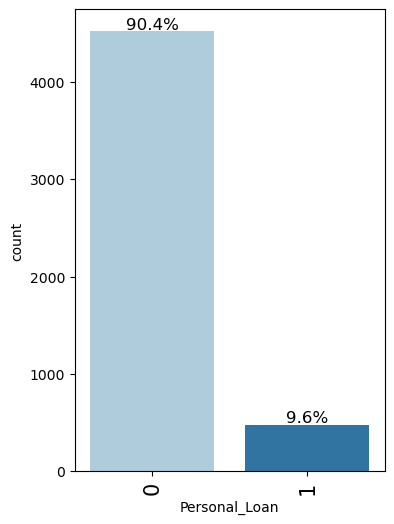

In [15]:
labeled_barplot(data_copy, "Personal_Loan", perc=True)

* 9.6% customers took the persoanl loan offered in last campaign.
* Class distribution is highly imbalanced towards negative class.

##### Observations on Family size

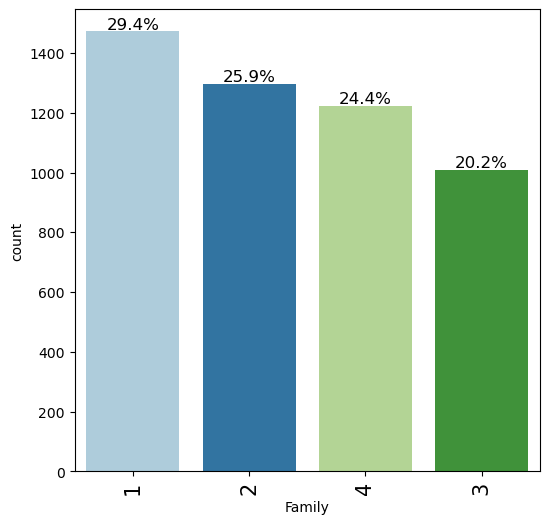

In [16]:
labeled_barplot(data_copy, "Family", perc=True)

* Family size is very close in terms of distribution across 4 different sizes.
* Family of size 1 features most prominently in our dataset.

##### Observations on Online usage (internet banking)

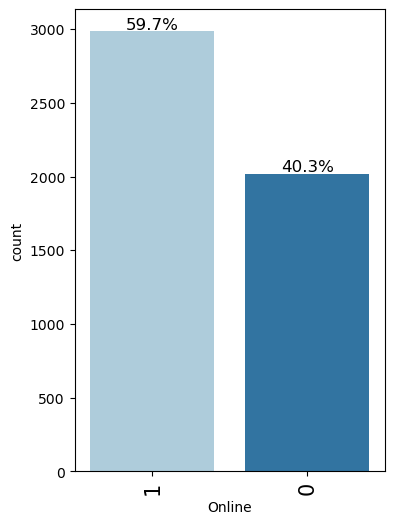

In [17]:
labeled_barplot(data_copy, "Online", perc=True)

* Around 60% customers use internet banking facility
* This also means that a large portion of customer base is not reachable online

##### Observations on Education level

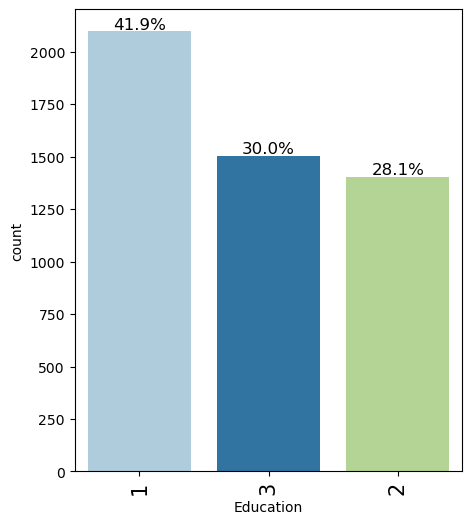

In [18]:
labeled_barplot(data_copy, "Education", perc=True)

* Around 42% customers are undergraduates.
* Around 30% customers are graduates or advanced/professionals

##### Observations on Securities_Account with bank

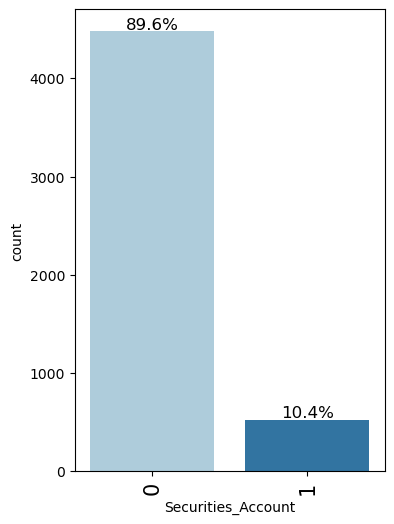

In [19]:
labeled_barplot(data_copy, "Securities_Account", perc=True)

* Majority of customers have Securities account with the bank

##### Observations on CD_Account with bank

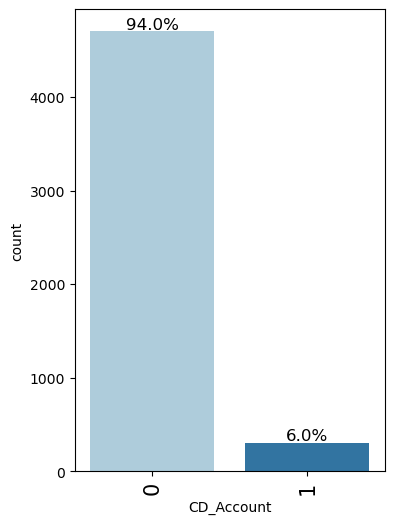

In [20]:
labeled_barplot(data_copy, "CD_Account", perc=True)

* Majority of customers have Credit of deposit account with the bank

##### Observations on CreditCard

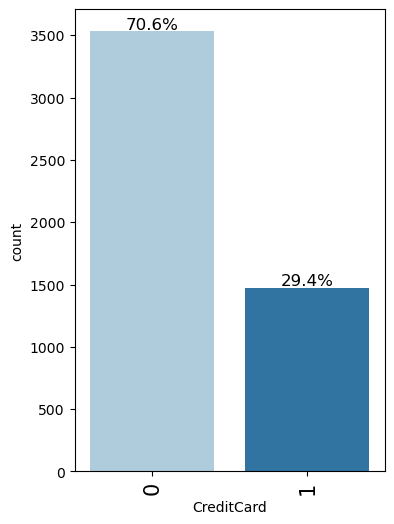

In [21]:
labeled_barplot(data_copy, "CreditCard", perc=True)

* Around 70% of the customers use the credit card offered by another bank
* This could indicate shortcomings in the banks credit card offerings or inability to project the product properly.

##### Observations on Age distribution of customers

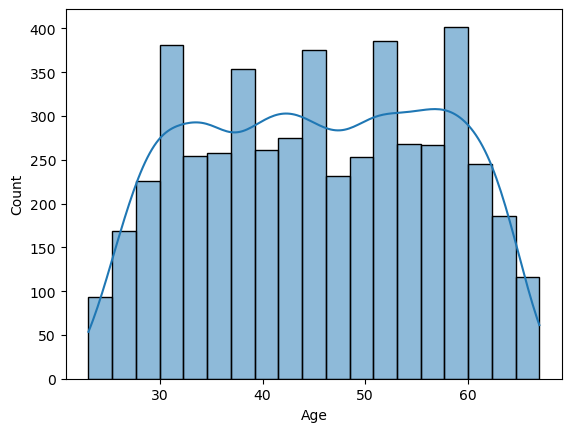

In [22]:
sns.histplot(data_copy['Age'], kde=True)
plt.show()

* Age data seems to be uniformly distributed.
* Customers of all ages are uniformly present in the dataset.

##### Observations on Experience level of customers

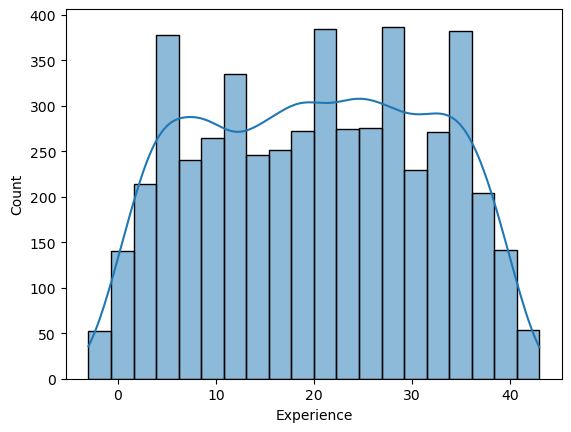

In [23]:
sns.histplot(data_copy['Experience'], kde=True)
plt.show()

* Dataset features people with all experience levels almost uniformly.
* There is no major skew present from the distribution.

##### Observations on Income of customers

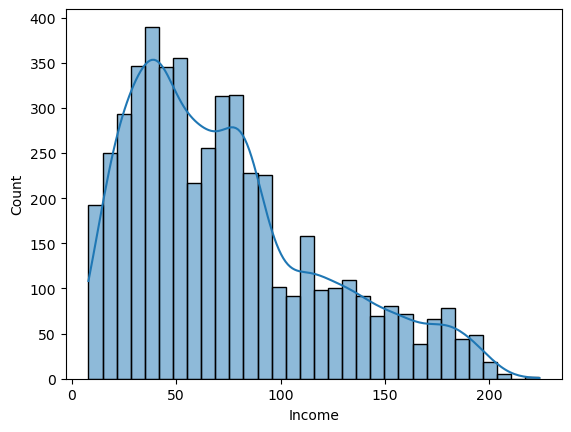

In [24]:
sns.histplot(data_copy['Income'], kde=True)
plt.show()

* Income data is right skewed with long tail to the right
* Few customers have income which is substantially higher than the average income
* Income data is widely spread from 8k to 200+k dollars.
* Majority of customers have income less than 100K dollars.

##### Observations on average credit card spending of customers

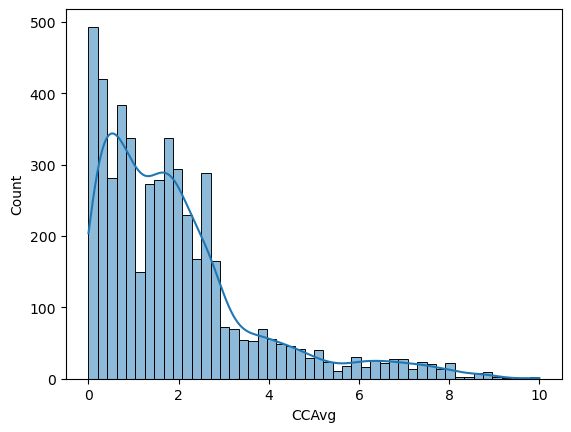

In [25]:
sns.histplot(data_copy['CCAvg'], kde=True)
plt.show()

* Average credit card spendings data is right skewed.
* Few customers have unusually high spendings on their credit cards reaching upto 10k dollars.
* Most customers have less than 3k dollars in monthly average credit card spendings.

##### Observations on house mortagage of customers

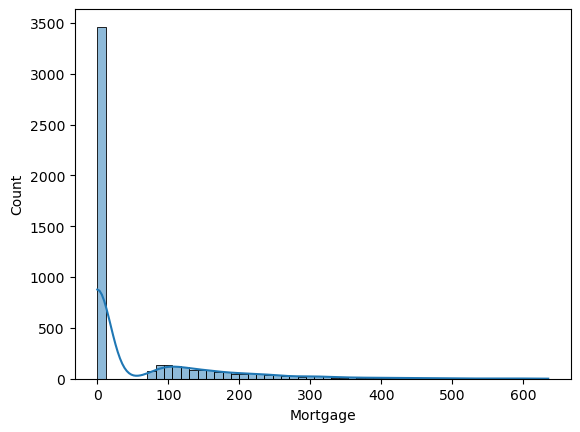

In [26]:
sns.histplot(data_copy['Mortgage'], kde=True)
plt.show()

In [27]:
# Calculate percentage of customers having no mortgage with the bank
print(len(data_copy[data_copy['Mortgage'] == 0]) / len(data_copy) * 100,'%')

69.24 %


* Majority of customer(69%) don't have any mortgage with the bank.
* Mortgage data is right skewed with a very few customers having very high mortgage with the bank

#### Bivariate analysis

##### Observations on effect of Education, Family, Security_Account, CD_Account, Online and CreditCard on Personal_Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


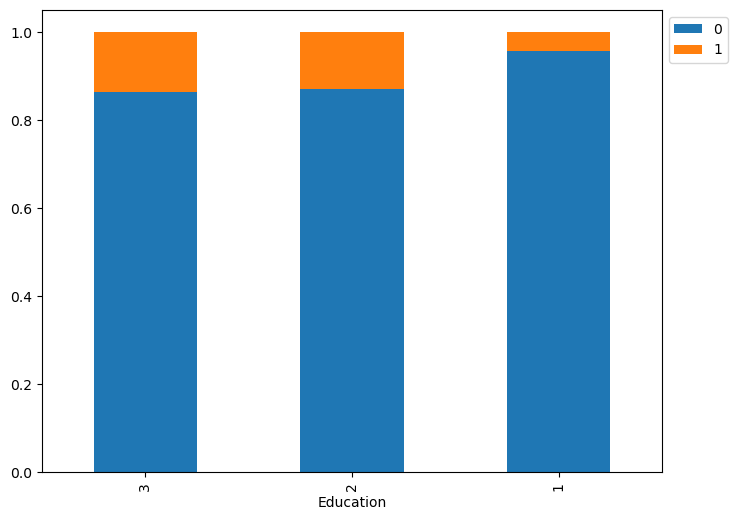

In [28]:
stacked_barplot(data_copy, "Education", "Personal_Loan")

* Customers with Education Level 2 are more likely to take a personal loan compared to other groups.
* The plot suggests that education level may influence loan-taking behavior, but not in a strictly linear way as Level 2 shows the highest uptake and not Level 3.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


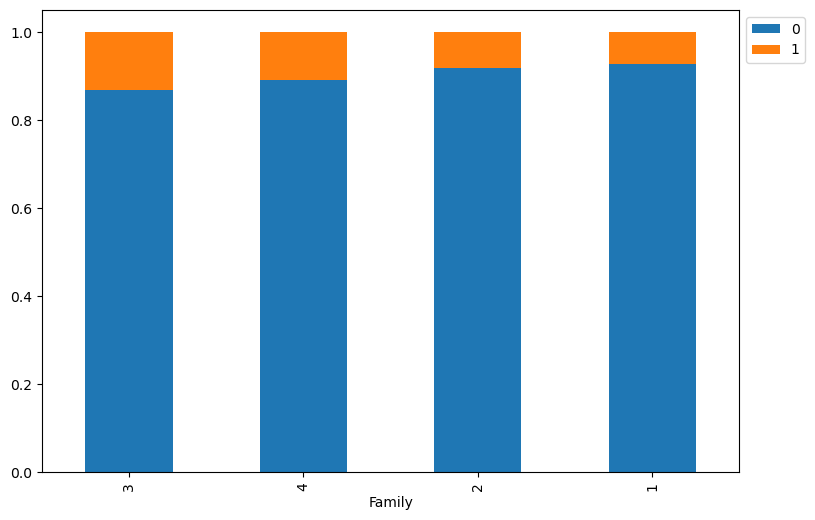

In [29]:
stacked_barplot(data_copy, "Family", "Personal_Loan")

* Family size 3 has the highest proportion of personal loan takers.
* Larger families (3 or 4 members) appear more likely to take personal loans.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


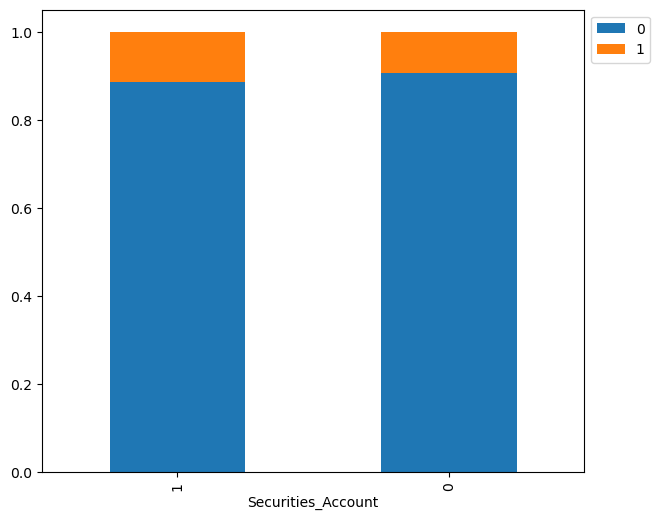

In [30]:
stacked_barplot(data_copy, "Securities_Account", "Personal_Loan")

* Most individuals do not have a securities account
* Customers with a securities account are slightly more likely to take a personal loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


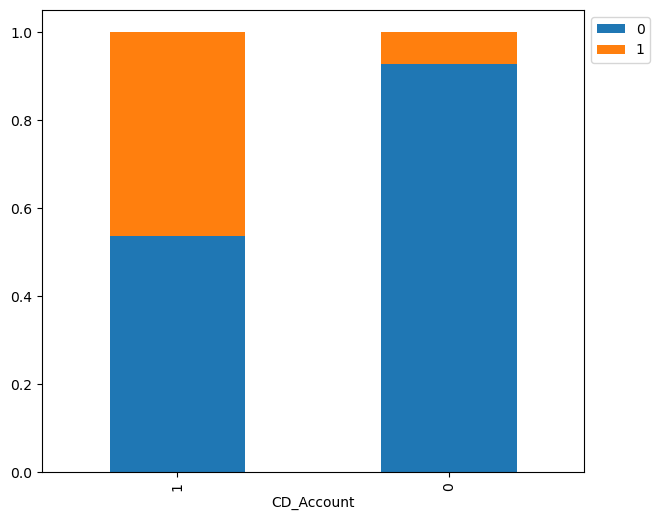

In [31]:
stacked_barplot(data_copy, "CD_Account", "Personal_Loan")

* Most individuals in the dataset have a CD account
* Proportion of personal loan takers is significantly higher among customers who do have a CD account

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


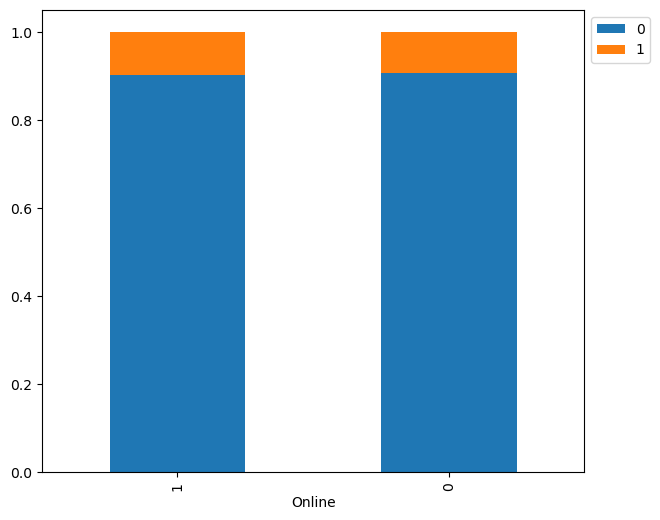

In [32]:
stacked_barplot(data_copy, "Online", "Personal_Loan")

* While the difference is not dramatic, customers who use online banking are marginally more likely to take a personal loan.
* This could suggest that digitally engaged users are more open to or more easily targeted for financial products like loans.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


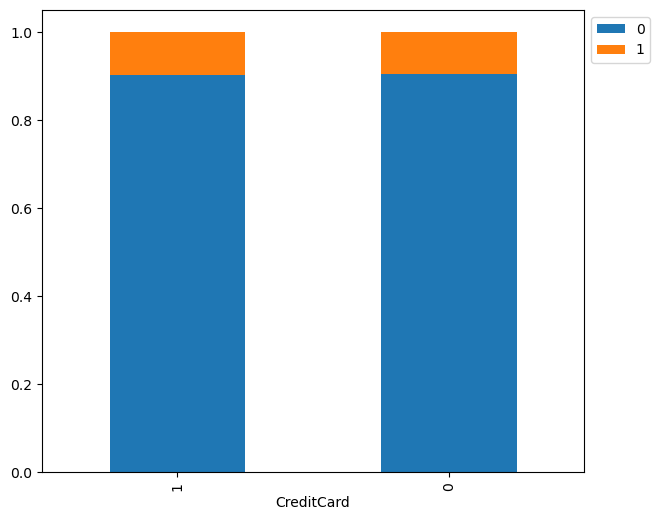

In [33]:
stacked_barplot(data_copy, "CreditCard", "Personal_Loan")

* Not much difference in proportion of customers who take personal loan whether they are using credit card from another bank or not.
* CreditCard does not seem to have strong influence on loan taking behavior

##### Observations on effect of Income, CCAvg, Mortgage and Age on Personal_Loan

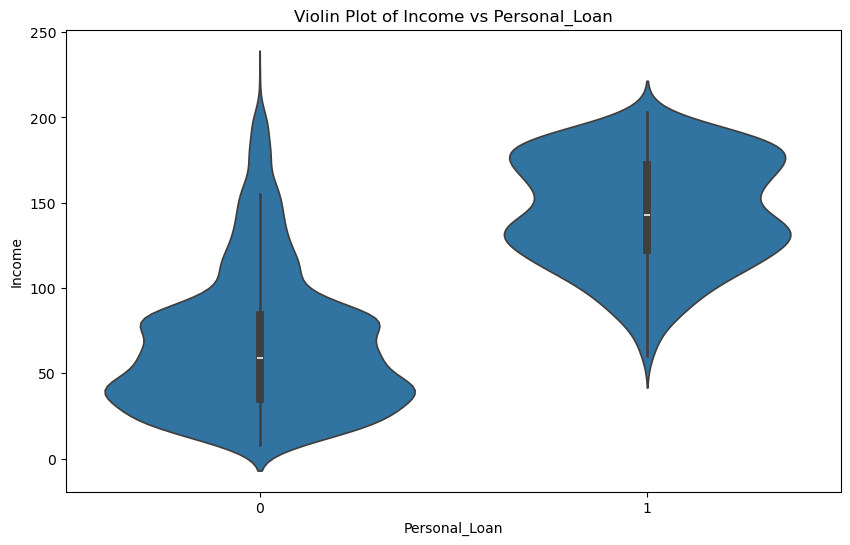

In [34]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Personal_Loan', y='Income', data=data_copy)
plt.title('Violin Plot of Income vs Personal_Loan')
plt.show()

* Individuals who took a personal loan tend to have a higher median income than those who did not
* Income is positively associated with the likelihood of taking a personal loan
* For customers who didn't take loan, the income distribution is wider at lower income levels, indicating more people with lower incomes did not take loans.
* For customers who did take loan, the distribution is more concentrated at higher income levels, suggesting that higher income is associated with a greater likelihood of taking a loan.

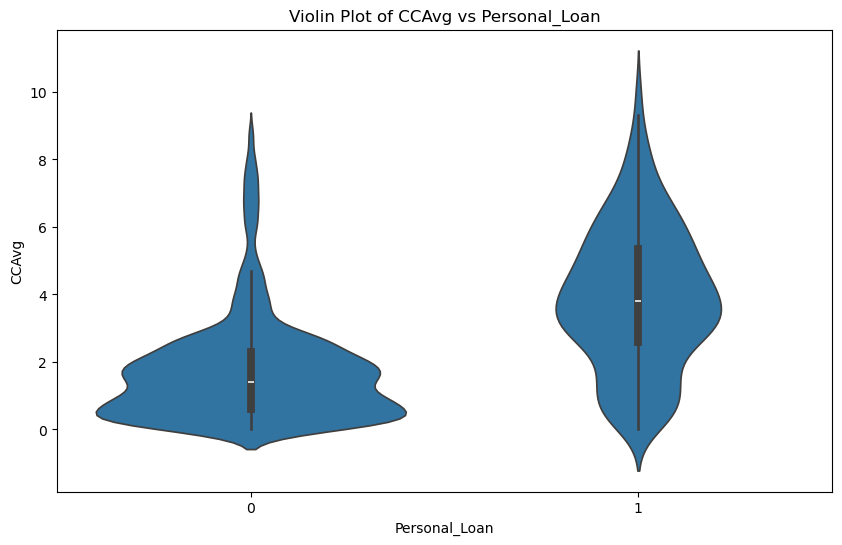

In [35]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Personal_Loan', y='CCAvg', data=data_copy)
plt.title('Violin Plot of CCAvg vs Personal_Loan')
plt.show()

 * Individuals who took a personal loan tend to have higher average credit card spending compared to those who did not.
 * The median CCAvg is visibly higher for those who took a loan.
 * For  customers who didn't take loan, the distribution is concentrated at lower CCAvg values, indicating most non-loan customers spend less on credit cards.
 * For  customers who did take loan, the distribution is wider and skewed toward higher values, suggesting that higher credit card usage may be associated with a greater likelihood of taking a loan
 * Plot suggests a positive association between credit card spending and the likelihood of taking a personal loan

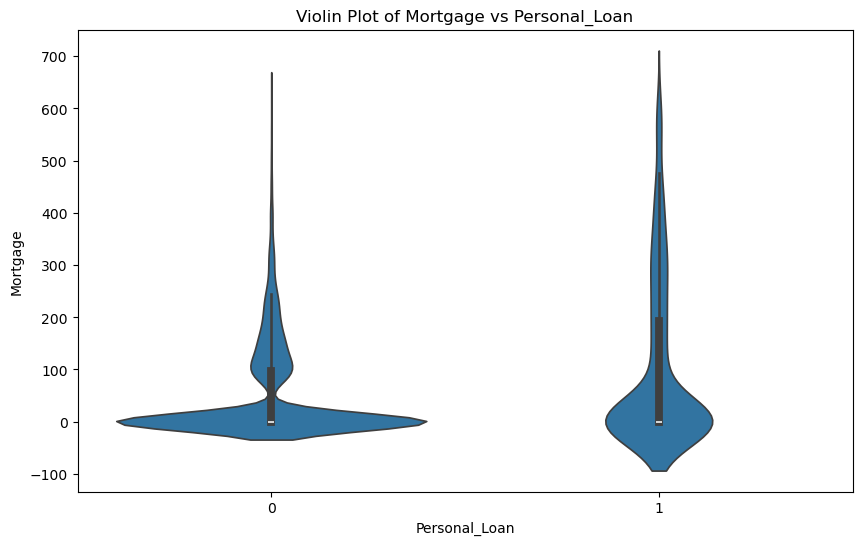

In [36]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Personal_Loan', y='Mortgage', data=data_copy)
plt.title('Violin Plot of Mortgage vs Personal_Loan')
plt.show()

* The concentration around zero for both groups suggests that many individuals may not have a mortgage at all.
* Among those who do, it doesn’t clearly influence loan-taking behavior.

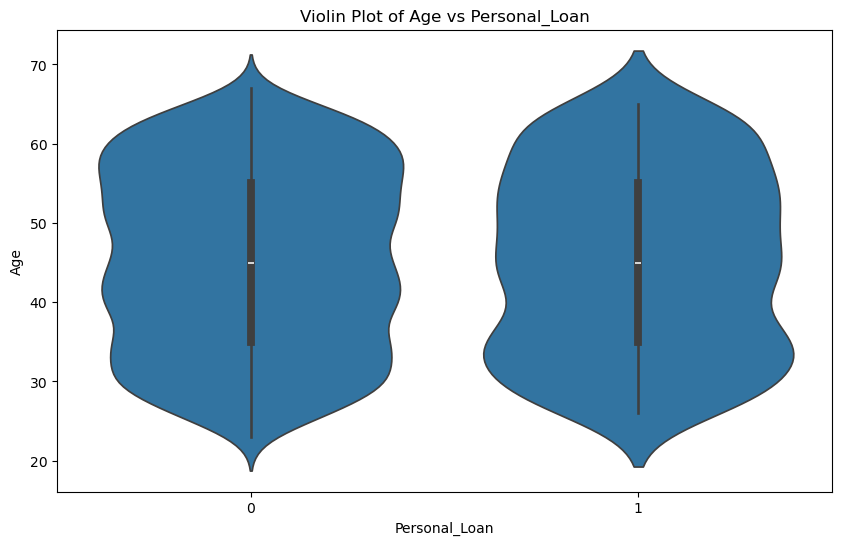

In [37]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Personal_Loan', y='Age', data=data_copy)
plt.title('Violin Plot of Age vs Personal_Loan')
plt.show()

* The median age is nearly the same for both groups.
* There is no strong visual difference in age distribution between those who took a personal loan and those who didn’t.
* Age doesn't seem to be influencing the loan taking behavior much.

#### Key observations from EDA

* Individuals who took a personal loan tend to have higher average credit card spending compared to those who did not.
* For customers who did take loan, the income distribution is more concentrated at higher income levels, suggesting that higher income is associated with a greater likelihood of taking a loan.
* Larger families (3 or 4 members) appear more likely to take personal loans.
* Education level may influence loan-taking behavior, but not in a strictly linear way as Level 2 shows the highest uptake and not Level 3.

## Data Preprocessing

#### Data Preparation for Modeling

> We have zipcodes in out dataset which needs to be handled properly.
  Since we are interested in whether customers from certain geographical regions are more likely to take loan, we could use frequency counts to replace the zipcodes.


> We also have negative experience values for some customers which indicates data corruption and need to be handled.
A reasonable way to deal with negative experience values would be to replace them with median experience in the respective age group since age seems highly correlated to experience as shown below.

In [38]:
# Map the zipcodes to the frequency count of the zipcode in the dataset
zip_counts = data["ZIPCode"].value_counts()
data["Zip_Encoded"] = data["ZIPCode"].map(zip_counts)

In [39]:
print("There are {} unique zipcount values in the dataset".format(zip_counts.nunique()))

There are 45 unique zipcount values in the dataset


In [40]:
# Drop the Zipcode column since we have Zip_Encoded column now
data = data.drop(["ZIPCode"], axis=1)

In [41]:
# Verify if the column is actually dropped
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Zip_Encoded
0,25,1,49,4,1.6,1,0,0,1,0,0,0,25
1,45,19,34,3,1.5,1,0,0,1,0,0,0,46
2,39,15,11,1,1.0,1,0,0,0,0,0,0,169
3,35,9,100,1,2.7,2,0,0,0,0,0,0,11
4,35,8,45,4,1.0,2,0,0,0,0,0,1,46


In [42]:
# Check the correlation between age and Experience
data[["Age", "Experience"]].corr()

,Age,Experience
Age,1.000000,0.994215
Experience,0.994215,1.000000


In [43]:
# Since Age and Experience are highly correlated, it is reasonable to replace corrupted experience with median values from respective age groups
data["Experience"] = data.apply(
    lambda row: data[data["Age"] == row["Age"]]["Experience"].median()
    if row["Experience"] < 0 else row["Experience"], axis=1
)

In [44]:
# Drop the dependent variable column i.e Personal_Loan from our data
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

##### Creating train and test splits

In [45]:
# Split the data in train and test set
# We will keep 20% data for test since dataset is not very large.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [46]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4000
Number of rows in test data = 1000


In [47]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    0.905
1    0.095
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.9
1    0.1
Name: proportion, dtype: float64


* Proportion of customers who took loan is almost similar in both train and test set
* We can say that train and test come from similar distribution

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will not take personal loan but in reality, the customer will take the loan.

2. Predicting a customer will take personal loan but in reality, the customer will not take the loan.

**Which case is more important?**

* If we predict a person won't take a loan but he could then bank would lose an opportunity of providing loan to a potential customer.

**How to reduce this loss i.e need to reduce False Negatives?**
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

### Helper Functions

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [49]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

In [50]:
# Build a decision tree classifier with default parameter settings 
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Check performance on train set

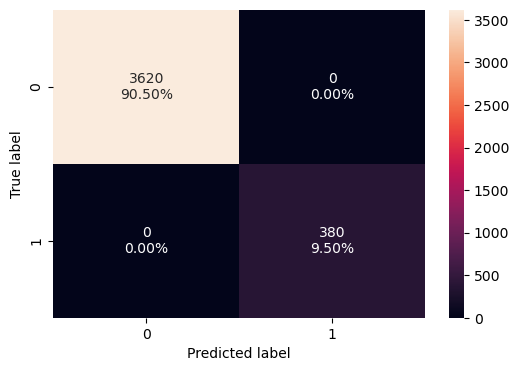

In [51]:
# Print confusion matrix for training data
confusion_matrix_sklearn(model0, X_train, y_train)

In [52]:
# Print accuracy, recall, precision and f1-score for training data
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Check performance on test set

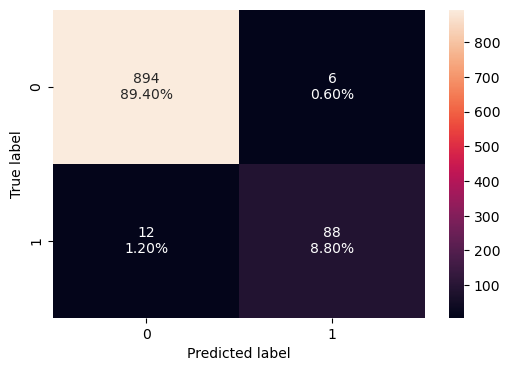

In [53]:
# Print confusion matrix for test data
confusion_matrix_sklearn(model0, X_test, y_test)

In [54]:
# Print accuracy, recall, precision and f1-score for test data
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.88,0.93617,0.907216


**Observations**
* Model is giving good and generalized results on training and test set.
* Recall seems to be slightly worse than the precision means model needs to reduce false negatives.

#### Visualizing the Tree

In [55]:
# Get all the feature names from the dataset
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Zip_Encoded']


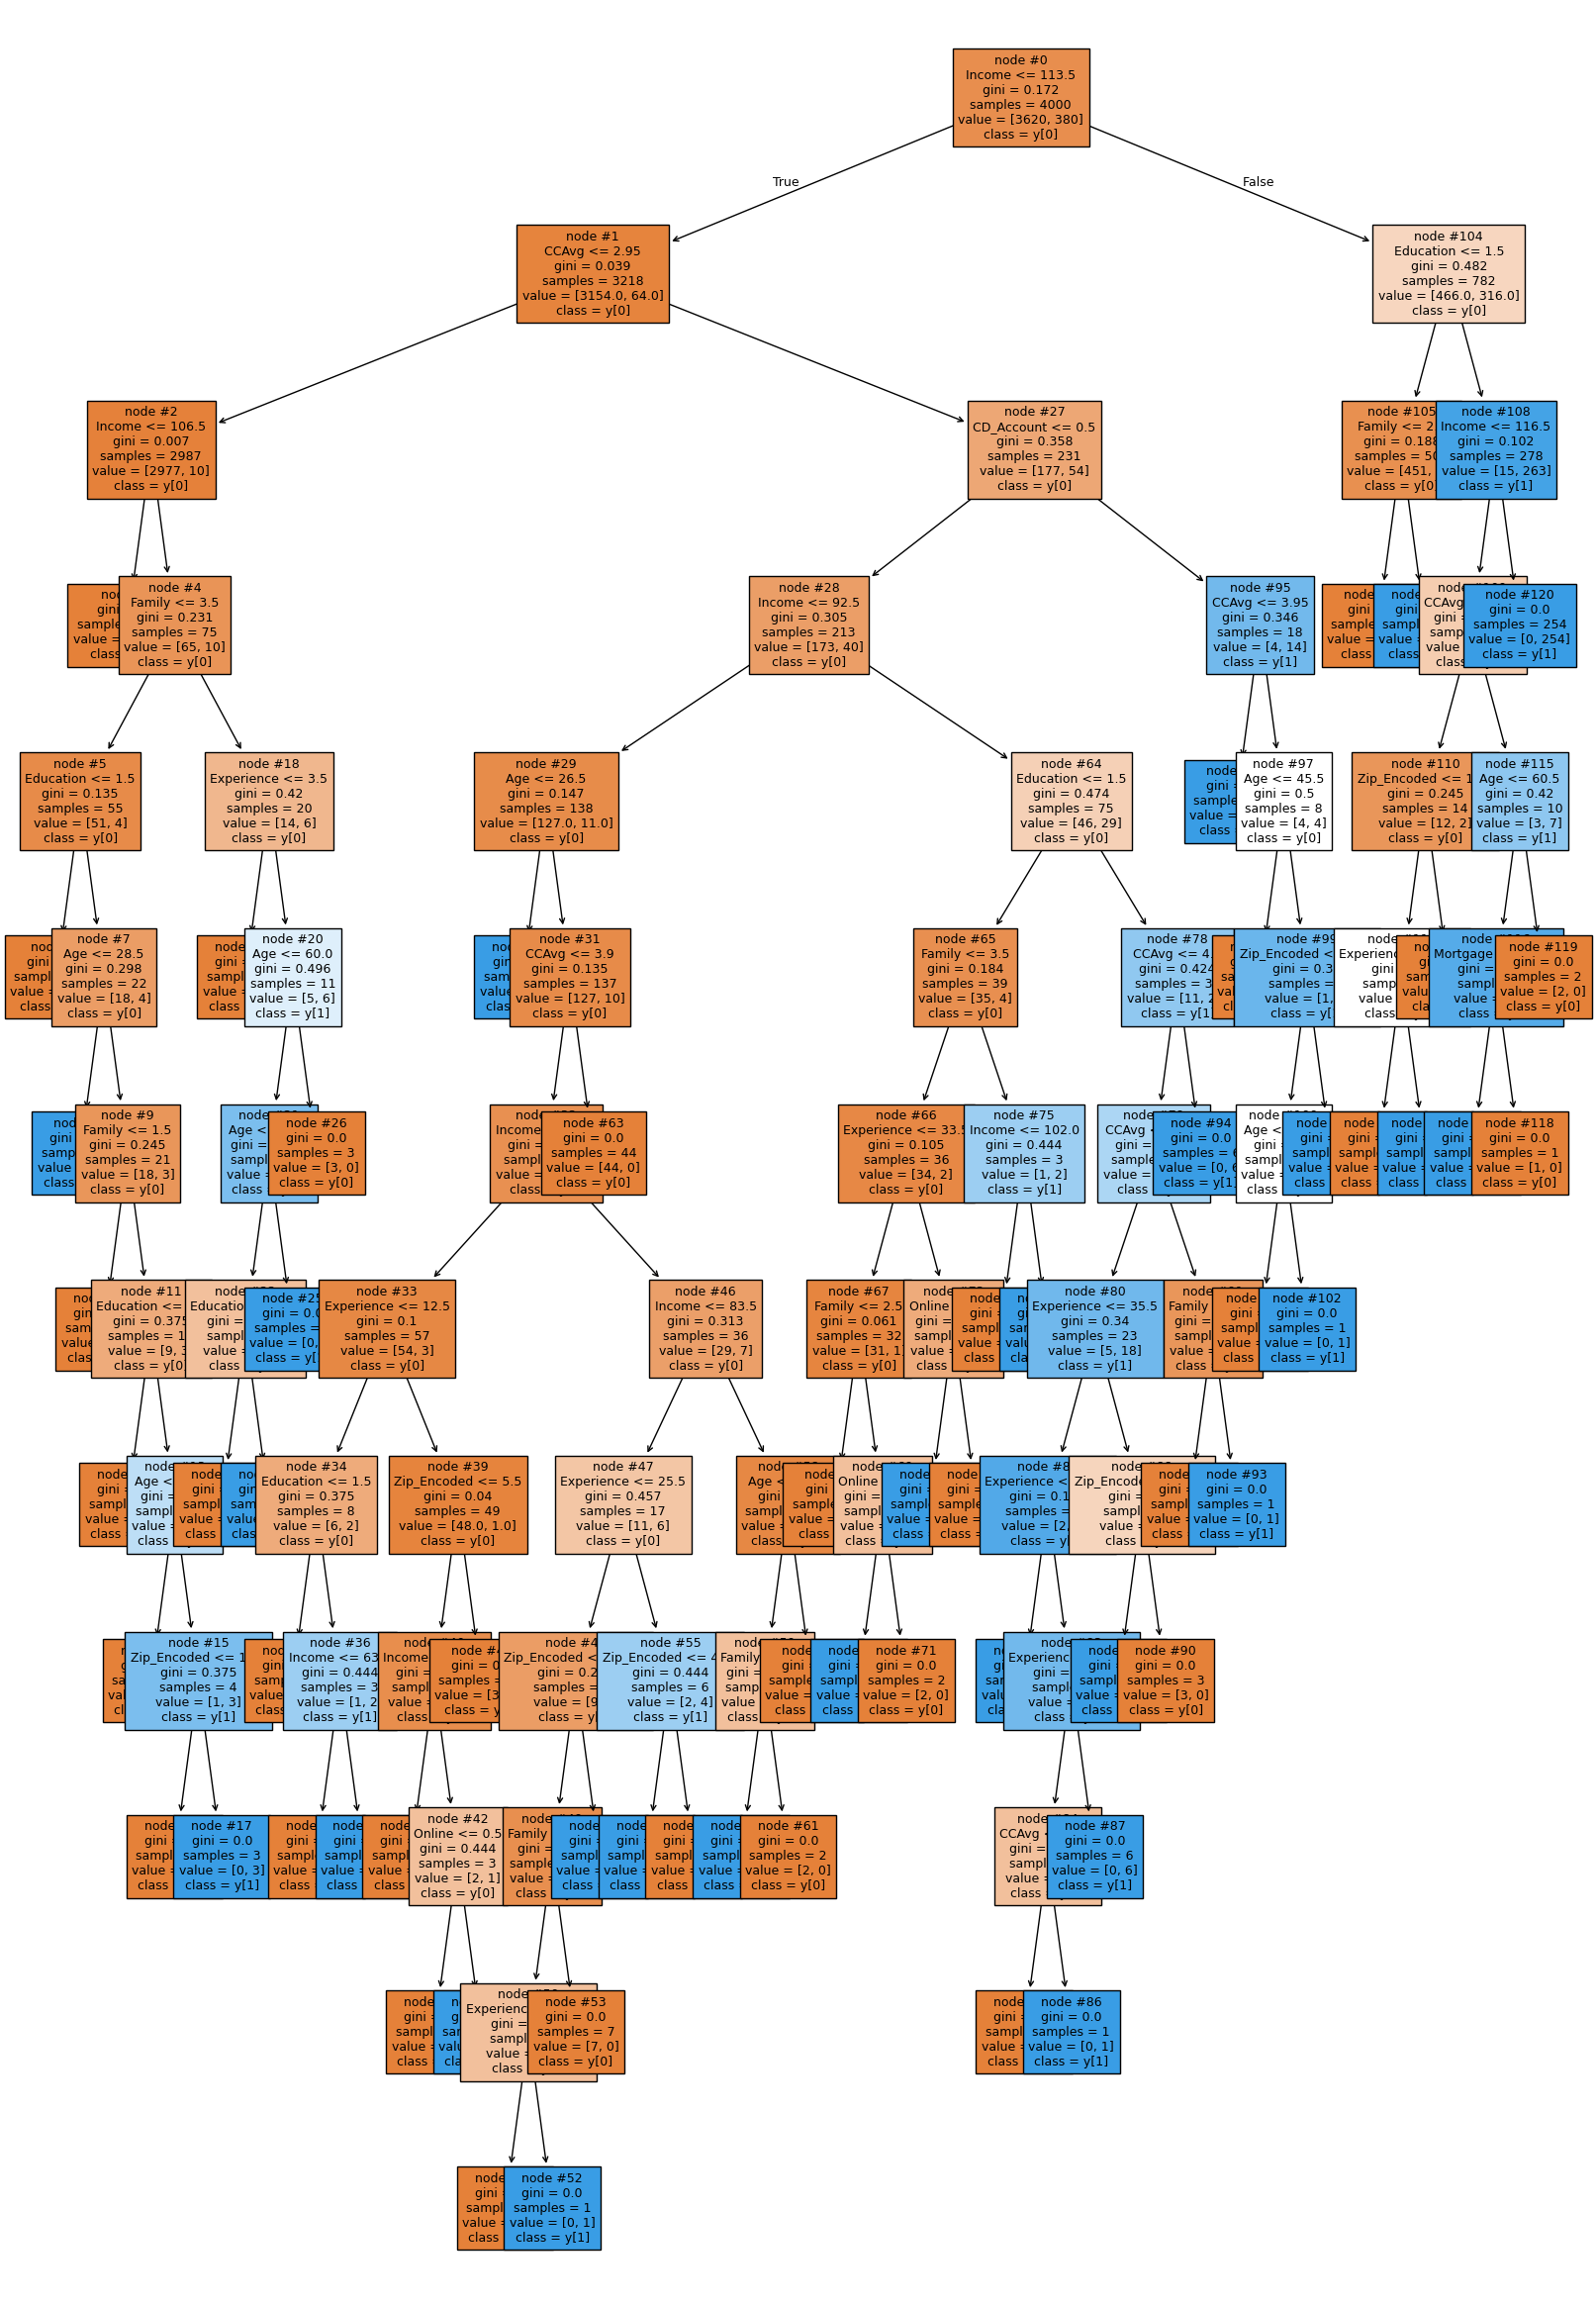

In [56]:
# Plot the tree figure for visualization
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [57]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2912.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [33.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  33.50
|   |   |   |   |   |   |   |   |   |--- Zip_En

#### Feature importance

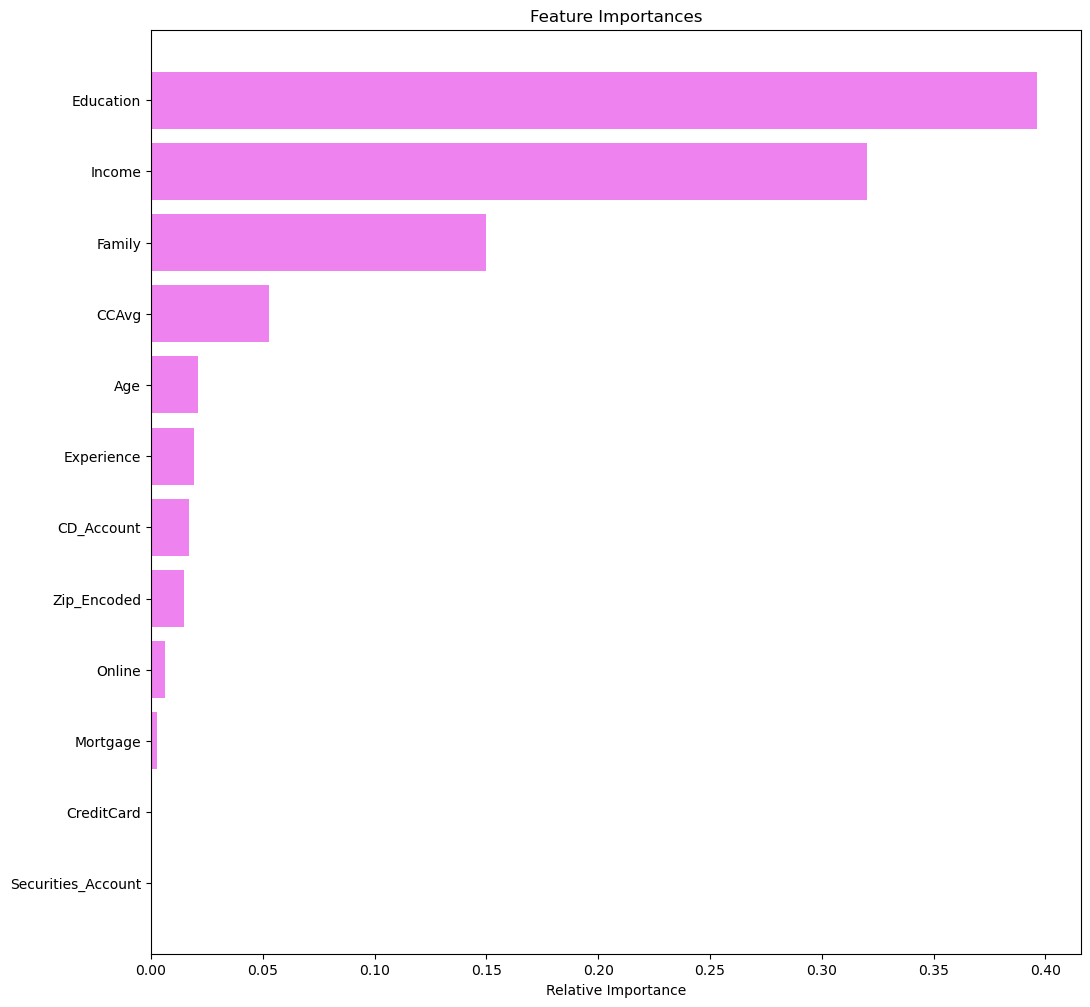

In [58]:

importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
* Education, Income, Family size and average credit card spending are top features by importance

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [59]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 1)
max_leaf_nodes_values = [20, 30, 40, 50, 60, 70]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# creating an instance of the best model
model1 = best_estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 20
Min samples split: 10
Best test recall score: 1.0


#### Check performance on train set

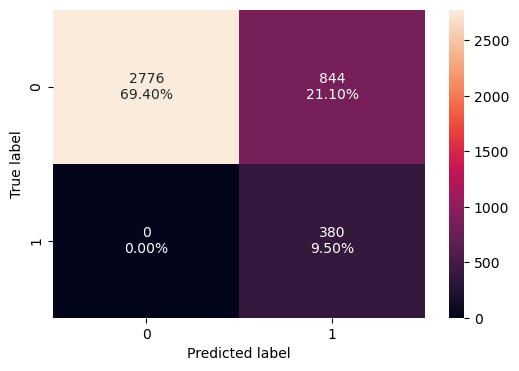

In [60]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [61]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.789,1.0,0.310458,0.473815


#### Checking model performance on test set

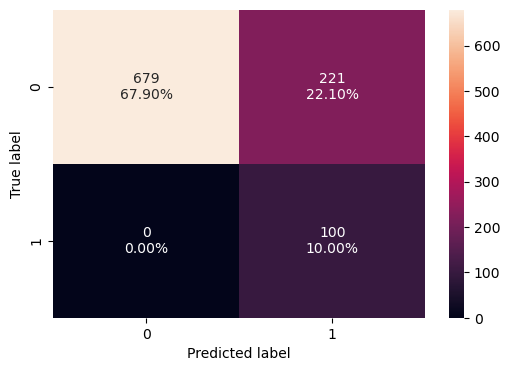

In [62]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [63]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779,1.0,0.311526,0.475059


**Observations**
* Model is giving good recall but very bad precision on both training and test data.
* Overall F1 score has suffered as we tried to prioritize recall over precision.
* Pre pruning seemed to have made the model worse than default settings.

#### Visualizing the decision tree

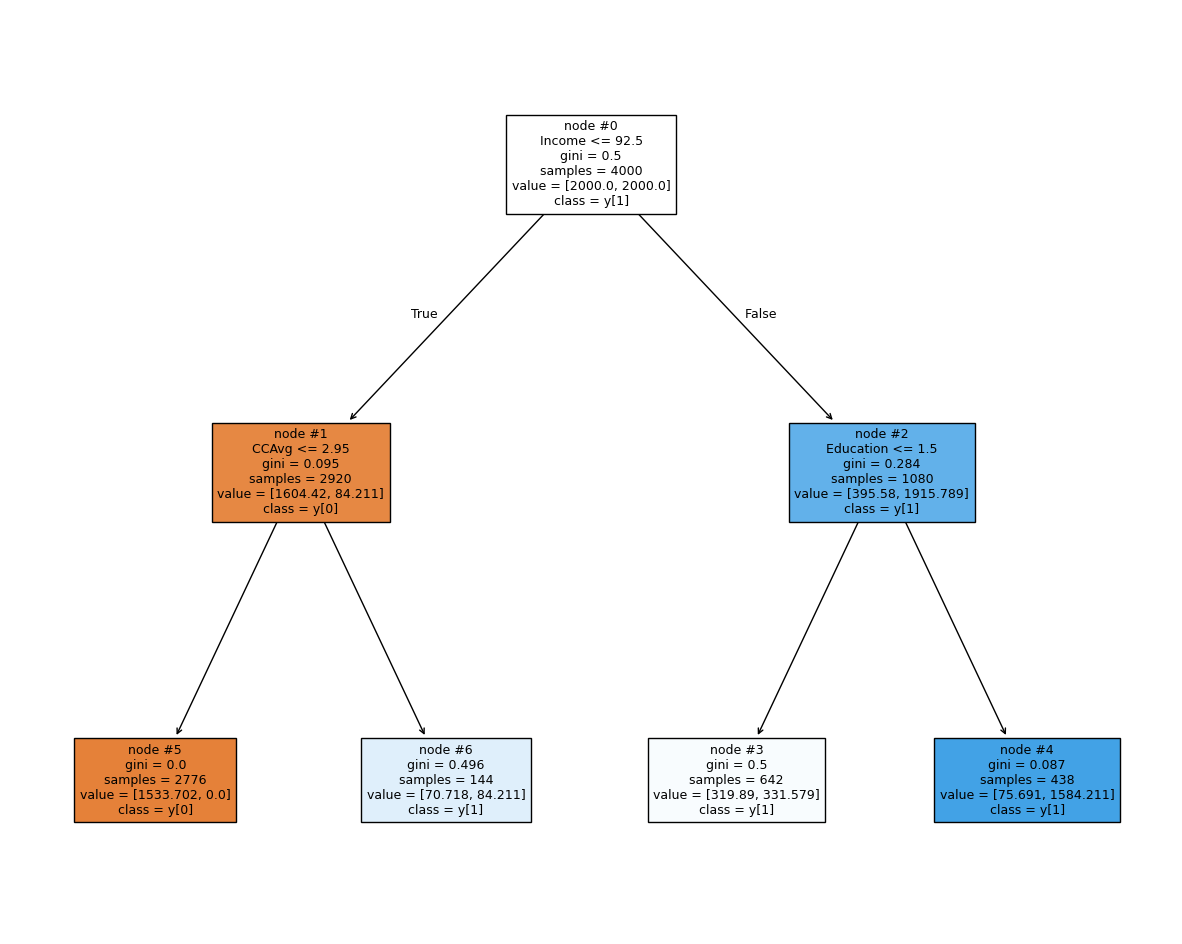

In [64]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

In [65]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1533.70, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.72, 84.21] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [319.89, 331.58] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [75.69, 1584.21] class: 1



#### Feature Importance

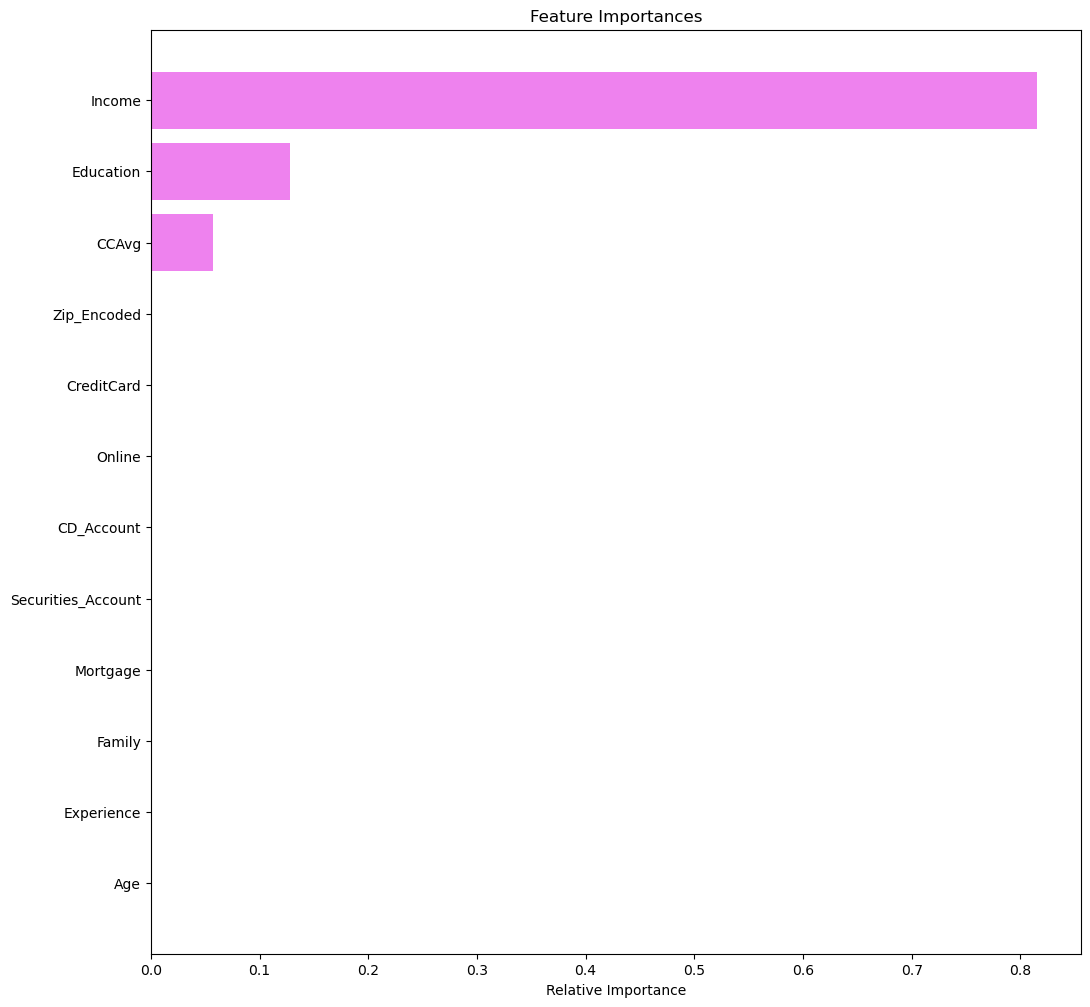

In [66]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
* Income, Education and average credit card spendings(CCAvg) are the most important features by importance.

### Decision Tree (post pruning)

- Cost complexity pruning provides another option to control the size of a tree.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [67]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [68]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000163,0.000490
2,0.000200,0.000890
3,0.000225,0.001340
4,0.000236,0.002284
5,0.000237,0.002758
6,0.000296,0.003647
7,0.000300,0.004247
8,0.000310,0.005178
9,0.000314,0.006433


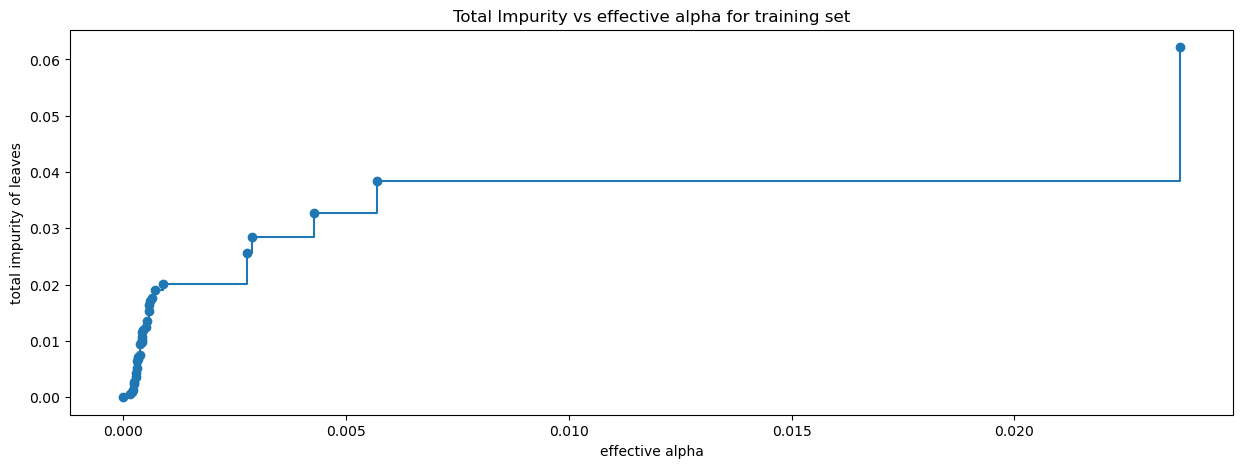

In [69]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [70]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05488890137246506


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

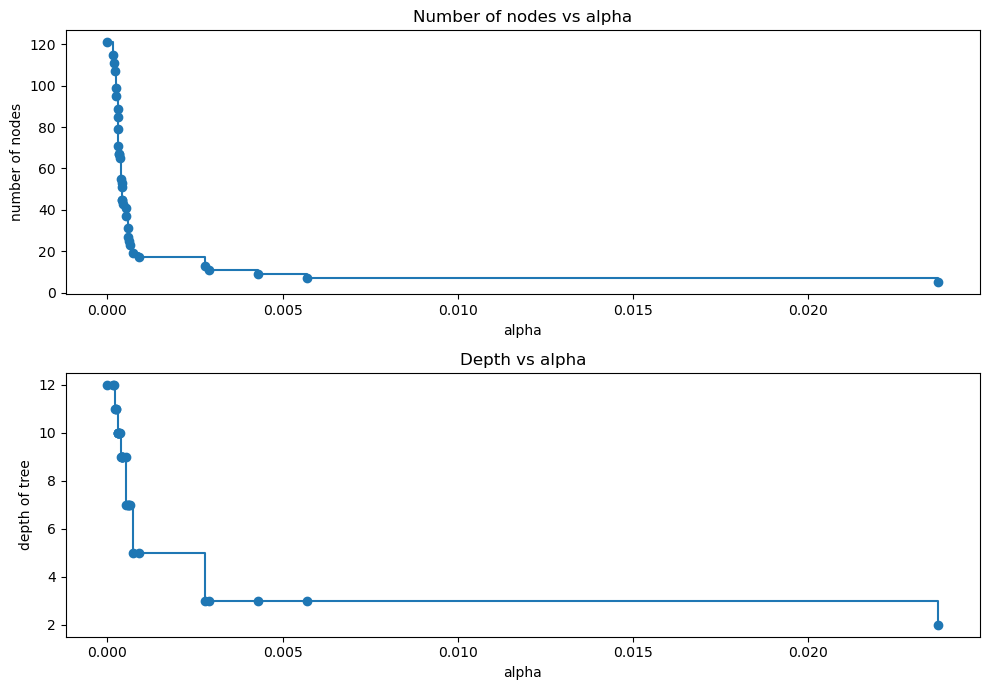

In [71]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Recall vs alpha for training and testing sets

In [72]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [73]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

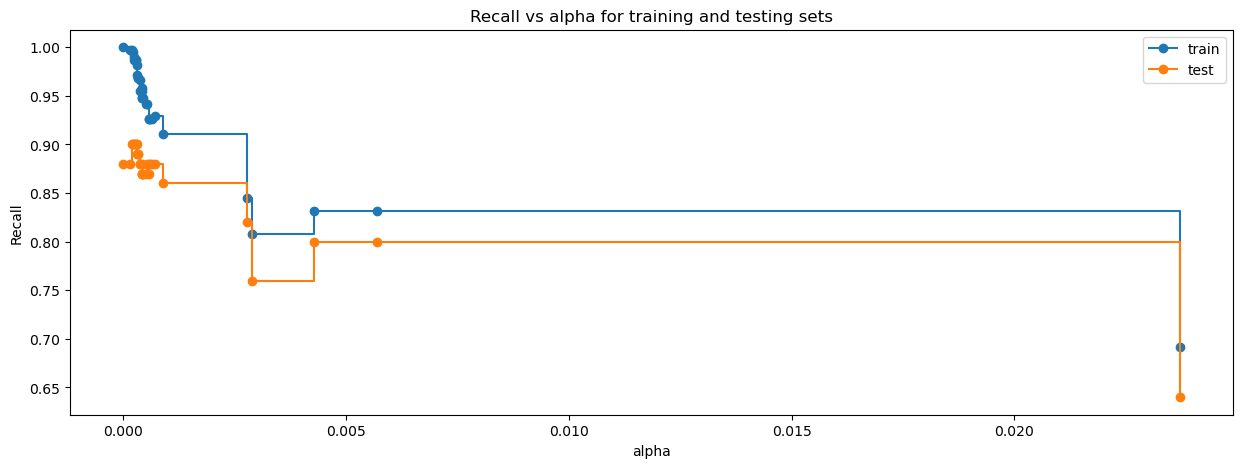

In [74]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [75]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00019999999999999996, random_state=1)


#### Checking model performance on training set

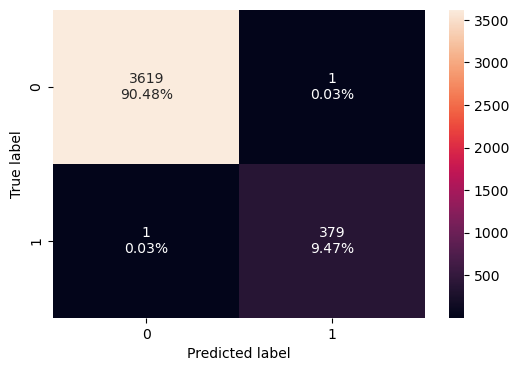

In [76]:
model3 = best_model
confusion_matrix_sklearn(model3, X_train, y_train)

In [77]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    model3, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.9995,0.997368,0.997368,0.997368


#### Checking model performance on test set

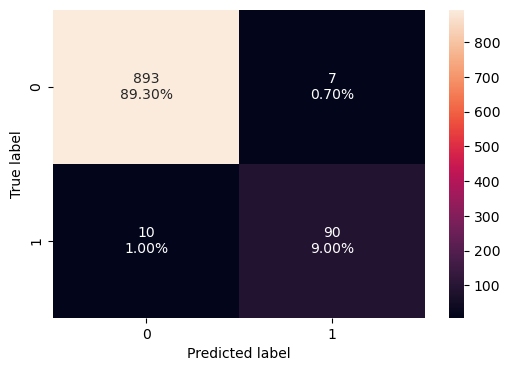

In [78]:
confusion_matrix_sklearn(model3, X_test, y_test)

In [79]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    model3, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.983,0.9,0.927835,0.913706


**Observations**
* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further compared to default settings based Decision tree.

#### Visualizing the Decision Tree

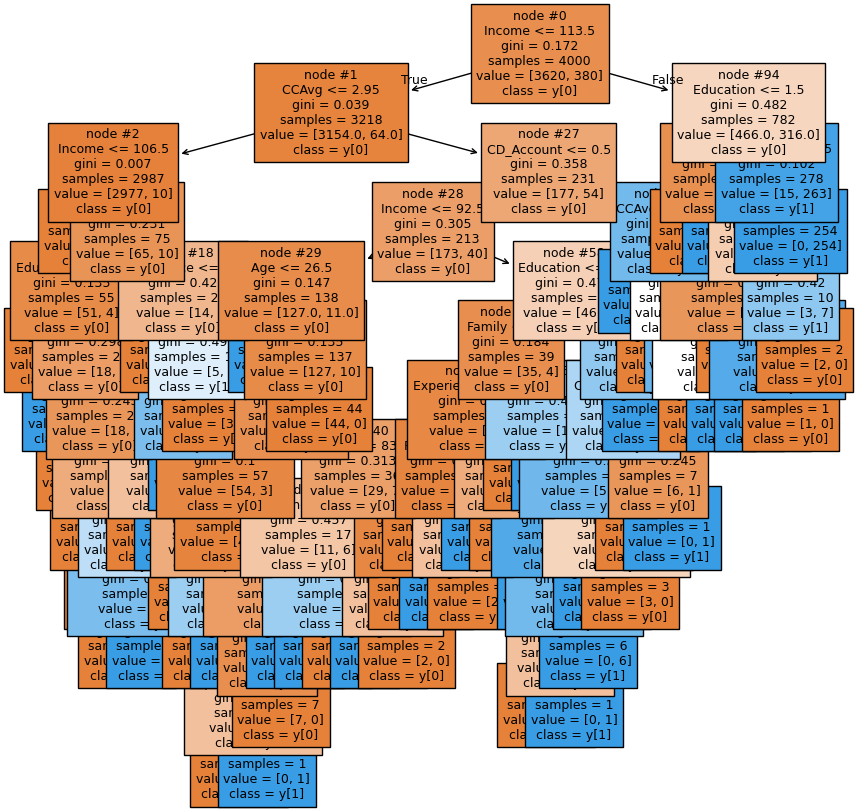

In [80]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [81]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2912.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [33.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  33.50
|   |   |   |   |   |   |   |   |   |--- Zip_En

In [82]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model3.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.398205
Income              0.321220
Family              0.150821
CCAvg               0.053158
Age                 0.019790
Experience          0.019382
CD_Account          0.016887
Zip_Encoded         0.013837
Online              0.004141
Mortgage            0.002558
Securities_Account  0.000000
CreditCard          0.000000


#### Feature Importance

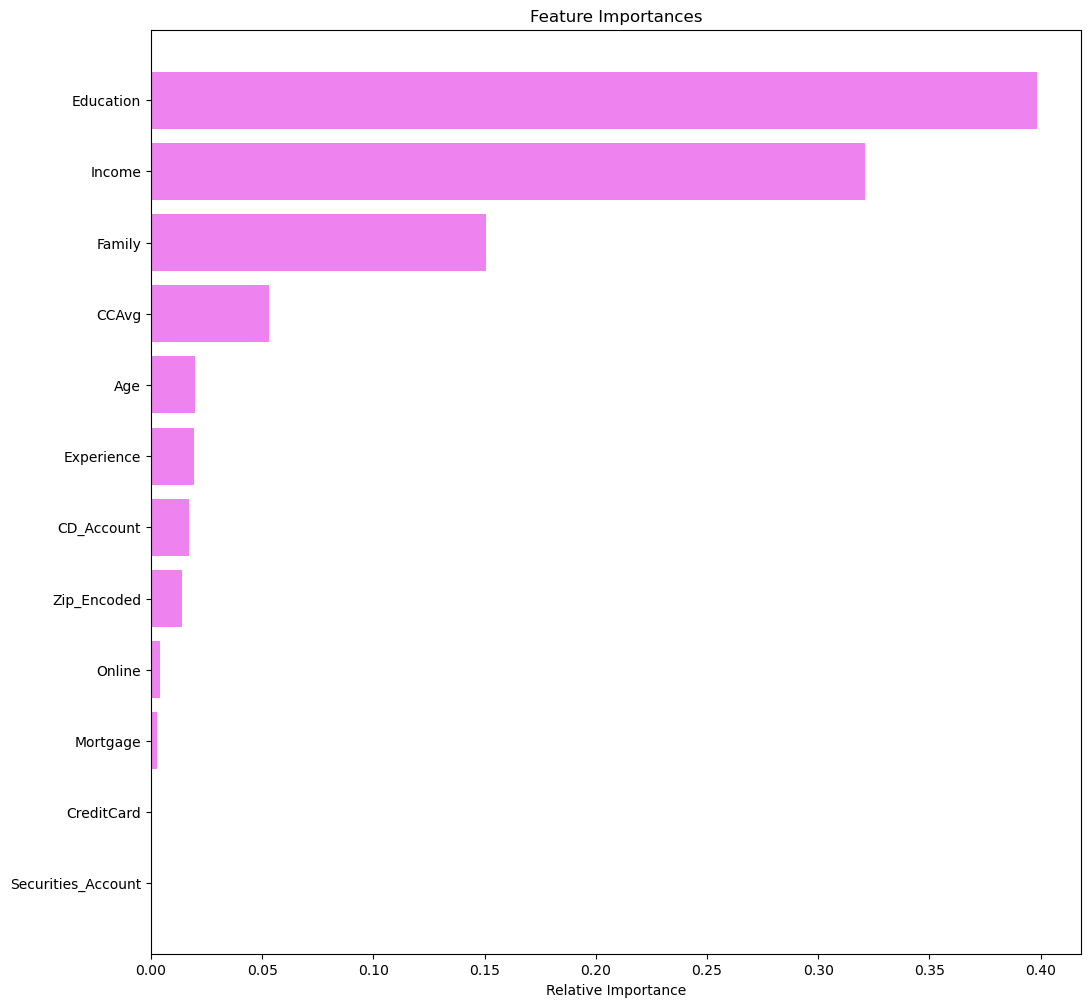

In [83]:
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education, Income, Family size and average credit card spendings(CCAvg) are the most important feature with post-pruning.

### Model Performance Comparison and Final Model Selection

In [84]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.789000,0.999500
Recall,1.0,1.000000,0.997368
Precision,1.0,0.310458,0.997368
F1,1.0,0.473815,0.997368


In [85]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.982000,0.779000,0.983000
Recall,0.880000,1.000000,0.900000
Precision,0.936170,0.311526,0.927835
F1,0.907216,0.475059,0.913706


# Insights and Recommendations

## Business Insights

### Key Takeaways from Model and Data Analysis

### 1. High-Income customers Are significantly more likely to accept personal loans
- `Income` is the **one of the most important predictor** of loan acceptance.
- High-income individuals show disproportionately higher conversion rates.

**Recommendation**: Focus campaign targeting on high-income segments. Tiered loan offers or pre-approved loans may work better here.

---

### 2.  Credit Card spending (CCAvg) strongly correlates with loan uptake
- Customers with higher `CCAvg` are **significantly more likely** to take loans.
- This aligns with the assumption that customers with higher spending needs or liabilities are open to personal loans.

**Recommendation**:  Identify high spenders (especially those not already using the bank’s credit card) as key loan prospects.

---

### 3. Education Level impacts loan conversion
- Graduate and Advanced education levels correlate with higher loan uptake.
- Undergraduates may need smaller loan amounts or more awareness about the product offerings.

**Recommendation**: Personalize loan offerings and messaging by education level. Professionals may respond better to premium or investment-related loan products.

---

### 4. Online Banking users show higher engagement
- Customers who use internet banking (`Online = 1`) are more likely to convert.
- While ~60% of customers use online banking, this segment had better model precision and higher conversion density.

**Recommendation**: **Digital channels** should be the primary mode of campaign delivery. Users already online are more reachable and responsive.

---

### 5. Cross-Selling opportunity: Credit Cards
- ~70% use **credit cards from other banks**.
- These customers are more receptive to personal loan offers.
- The bank’s own credit card holders had relatively lower loan acceptance rates.

**Recommendation**: Indicates a missed cross-sell opportunity. A bundled offering (loan + credit card switch + benefits) could convert more external credit card users.

---

### 6. Family size shows moderate influence on loan decisions
- Family size = 1 had the largest share, but in decision trees, family size 2–3 showed slightly higher loan uptake.
- Families with dependents may be more inclined toward liquidity via loans.

**Recommendation**: Target small families with specific personal loan themes (e.g., childs education, home improvement/renovation).

---

### 7. Mortgage Holders may be good Top-Up loan candidates
- Though not the strongest predictor, `Mortgage` is useful for segmentation by asset ownership.

**Recommendation**: Mortgage customers may be good candidates for top-up loans or refinancing offers. Offer top-up or refinance loans to existing mortgage holders.

---

### 8. Campaigns will miss 40% of customers if only run online
- A significant base **does not use online banking**.

**Recommendation**: Adopt a **hybrid campaign** strategy (branch outreach, SMS, phone calls + online) to reach full customer base.
